# Late Fusion
## Modality 5: Nutritional knowledge

## Setup

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [2]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [3]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

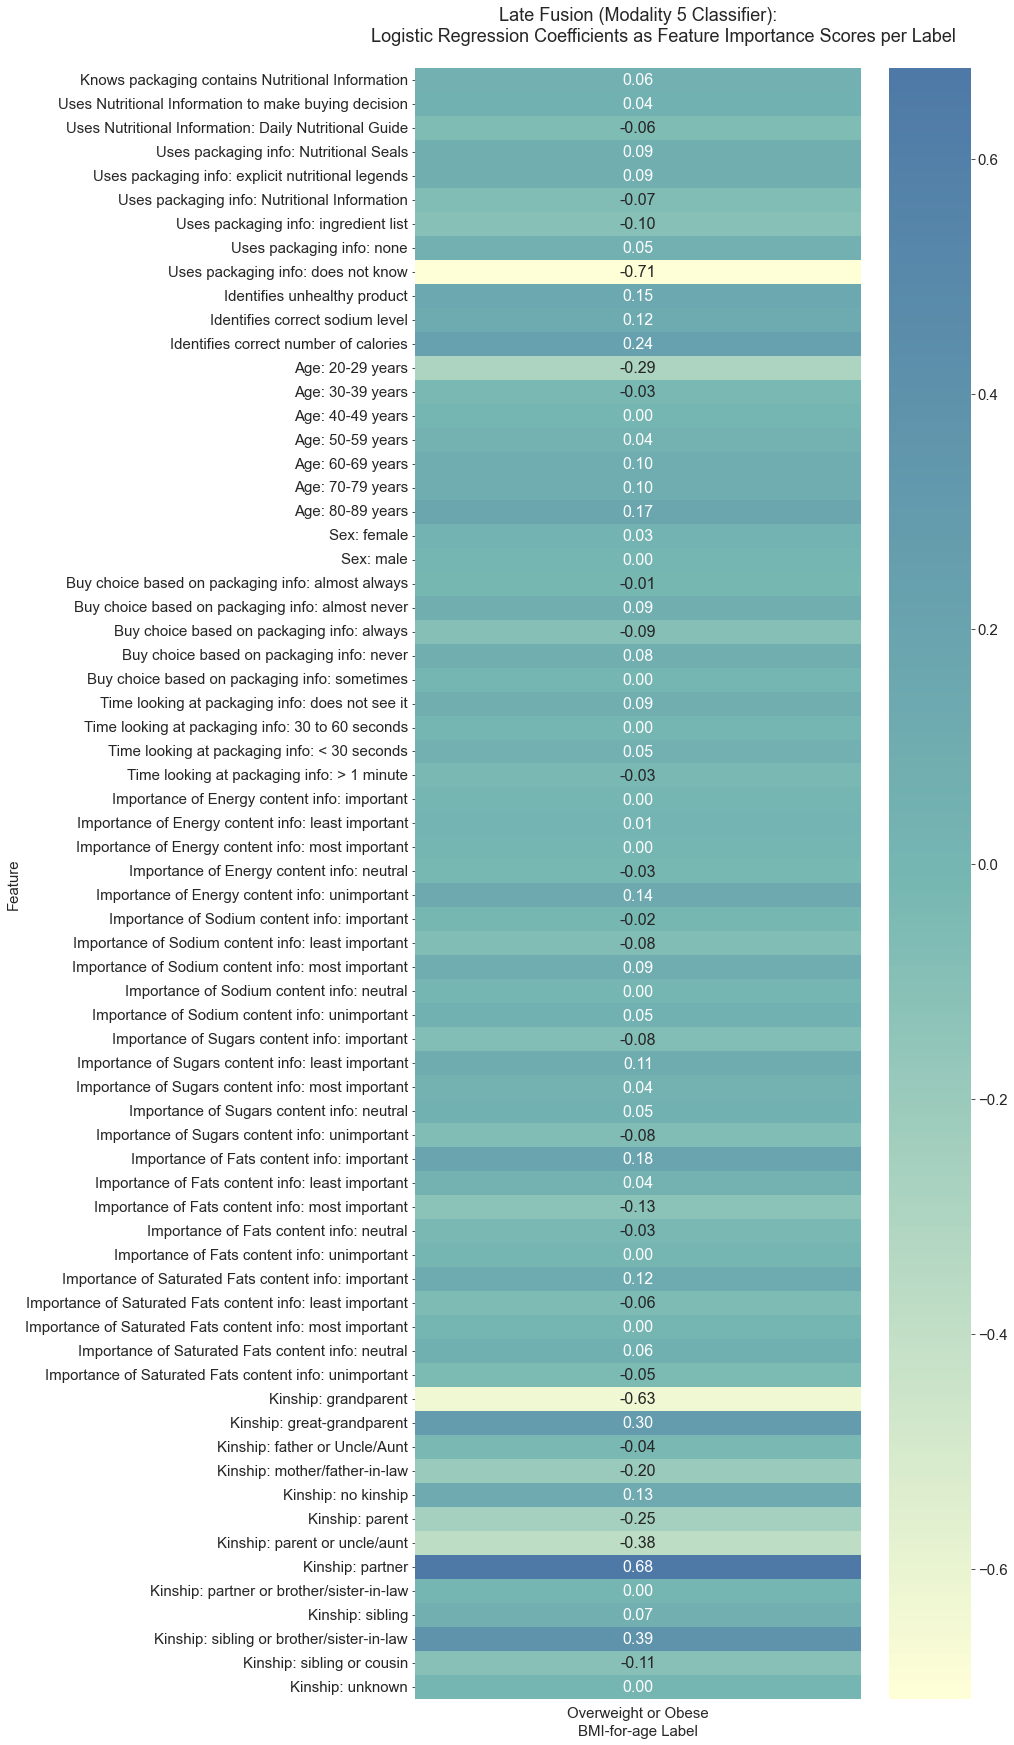

In [4]:
# Load data
train_m5_df = pd.read_csv(os.path.join(input_path, 'train_m5_encoded_df.csv'))
feat = list(train_m5_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','mod_elastic_net_m5.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_m5, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m5.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m5_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(10,30))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_m5_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 5 Classifier):
          Logistic Regression Coefficients as Feature Importance Scores per Label
          """)
plt.savefig(os.path.join(output_path,'others','m5_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [10]:
coef_df_ordered = coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)
coef_df_ordered.head(20)

,Overweight or Obese
Kinship: partner,0.677267
Kinship: sibling or brother/sister-in-law,0.389505
Kinship: great-grandparent,0.299381
Identifies correct number of calories,0.238218
Importance of Fats content info: important,0.184357
Age: 80-89 years,0.171253
Identifies unhealthy product,0.151608
Importance of Energy content info: unimportant,0.142892
Kinship: no kinship,0.125457
Identifies correct sodium level,0.122356


In [8]:
coef_df_ordered.tail(10)

,Overweight or Obese
Buy choice based on packaging info: always,-0.090288
Uses packaging info: ingredient list,-0.100063
Kinship: sibling or cousin,-0.105463
Importance of Fats content info: most important,-0.129823
Kinship: mother/father-in-law,-0.197257
Kinship: parent,-0.253792
Age: 20-29 years,-0.290190
Kinship: parent or uncle/aunt,-0.378349
Kinship: grandparent,-0.627059
Uses packaging info: does not know,-0.710726


In [6]:
clf.coef_

array([[ 5.56889609e-02,  4.43989493e-02, -6.19954074e-02,
         8.84436092e-02,  8.69185032e-02, -7.11305549e-02,
        -1.00063299e-01,  5.47261576e-02, -7.10725912e-01,
         1.51607670e-01,  1.22356096e-01,  2.38218174e-01,
        -2.90189526e-01, -3.46136564e-02,  0.00000000e+00,
         3.83617392e-02,  1.01390602e-01,  1.00761077e-01,
         1.71252773e-01,  3.00701248e-02,  0.00000000e+00,
        -1.18328067e-02,  9.15033544e-02, -9.02882098e-02,
         7.65366725e-02,  0.00000000e+00,  8.53437244e-02,
         0.00000000e+00,  5.46665993e-02, -3.09187888e-02,
         0.00000000e+00,  1.45190099e-02,  0.00000000e+00,
        -2.75003583e-02,  1.42891982e-01, -2.14571383e-02,
        -7.86168852e-02,  9.28151686e-02,  1.92301806e-03,
         4.81804209e-02, -8.19251223e-02,  1.08842937e-01,
         3.76463653e-02,  4.62410855e-02, -7.57133886e-02,
         1.84356911e-01,  3.77666882e-02, -1.29822993e-01,
        -3.12997836e-02,  0.00000000e+00,  1.15474321e-0

c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


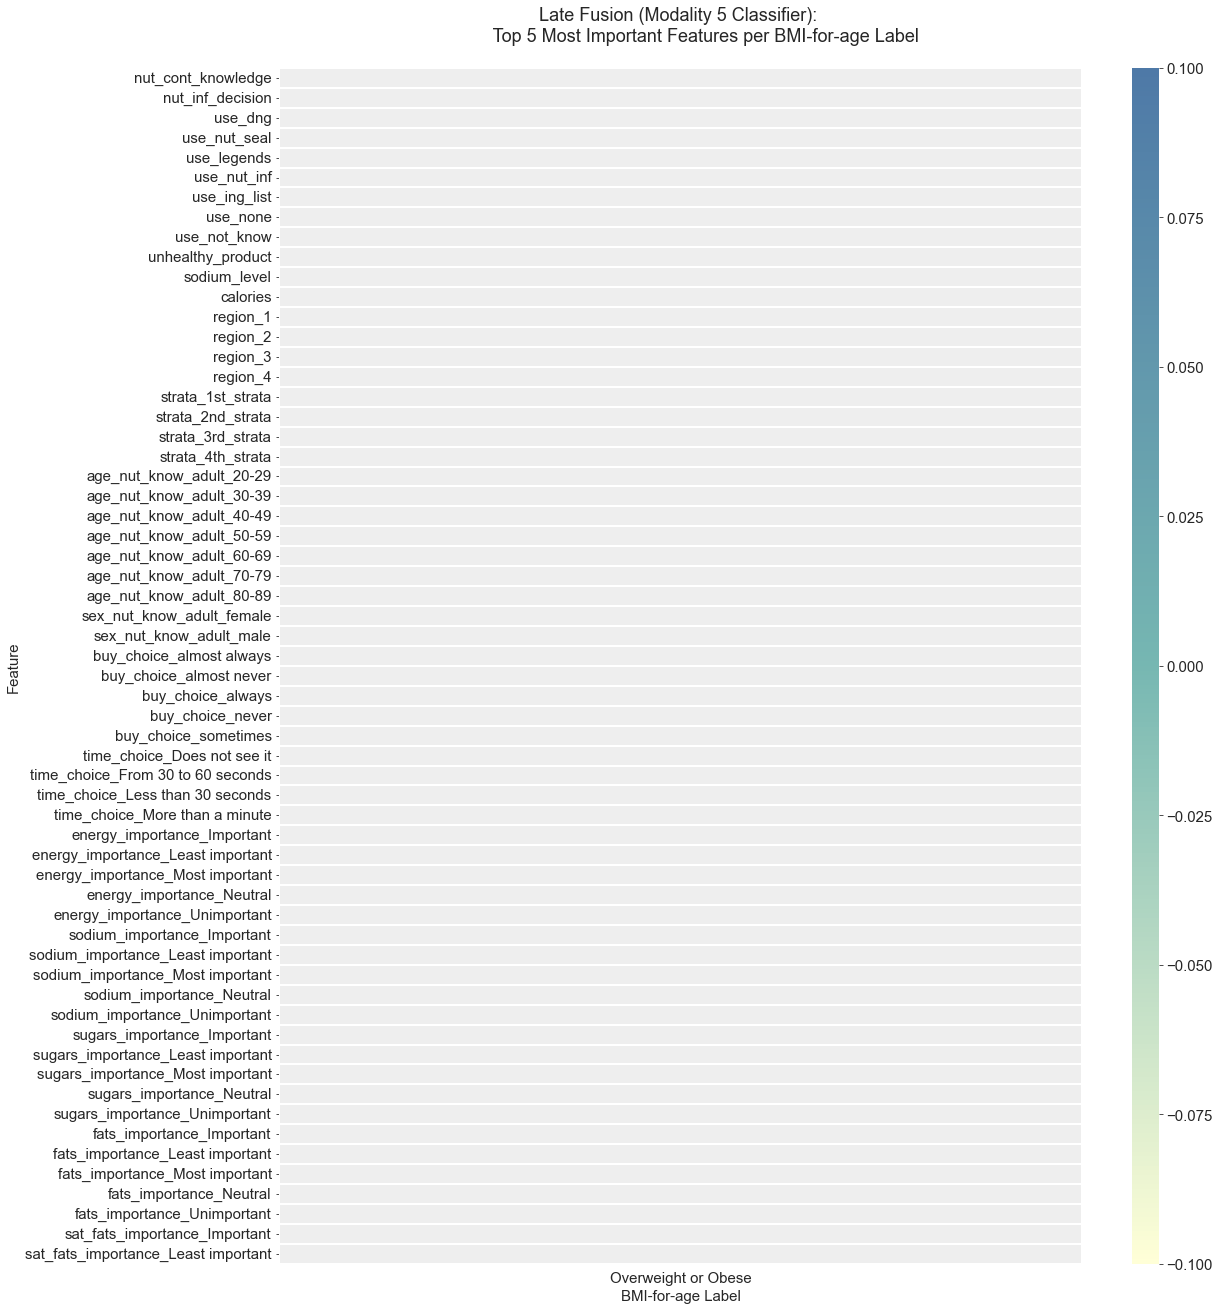

In [7]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_BMI_for_age_label = {}
n = 5
for c in data.columns:
    top_features_per_BMI_for_age_label[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_BMI_for_age_label.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_m5)
mask = np.array([[feat not in top_features_per_BMI_for_age_label[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'others','tmp','m5_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,22))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'others','report_m5_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 5 Classifier): 
          Top """ + str(n) + """ Most Important Features per BMI-for-age Label
          """)
plt.savefig(os.path.join(output_path,'others','m5_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})